In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


21446
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0824, 0.5451, 0.7255, 0.6039, 0.4824, 0.3922, 0.3922,
          0.6235, 0.6980, 0.1412, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.1804, 0.4275,
          0.6000, 0.6196, 0.5333, 0.7765, 0.9451, 0.9373, 0.9451, 0.9961,
          0.9059, 0.6549, 0.5608, 0.6157, 0.5255, 0.2510, 0.0000, 0.0000,
          0.0078, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0078, 0.0000, 0.0118, 0.5451, 0.5647, 0.5333,
          0.5059, 0.4980, 0.4549, 0.3725, 0.4745, 0.5804, 0.6275, 0.5412,
          0.4078, 0.4118, 0.4902, 0.5176, 0.5333, 0.5765, 0.5843, 0.0000,
          0.0000, 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0157, 0.0000, 0.3922, 0.5686, 0.4745, 0.4706,
          0.4863, 0.4745, 0.4902, 0.5020, 0.4471, 0.4235, 0.4392, 0.4392,
          0.4784, 0.5059, 0.4980, 0.4980, 0.4824, 0

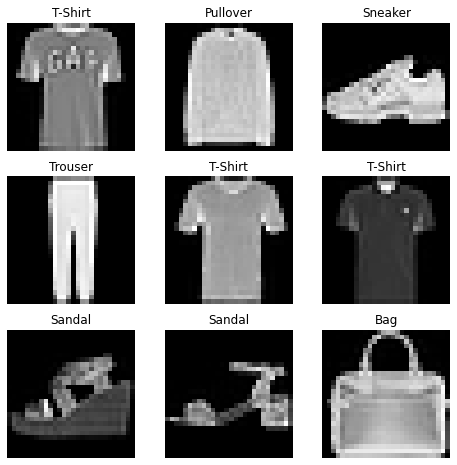

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    print(sample_idx)
    img, label = training_data[sample_idx]
    print(img)
    print(label)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
data_dir = '/content/drive/MyDrive/coolab/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


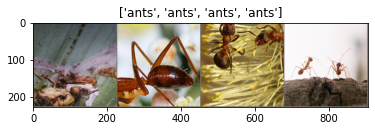

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
class Customconv(nn.Module):
    def __init__(self):
        super(Customconv, self).__init__()
        self.conv_base = nn.Sequential(
            nn.Conv2d(3,96,kernel_size = 11,stride=4,padding=2,bias=False),
            nn.ReLU(inplace =True),
            nn.MaxPool2d(kernel_size =3,stride = 2),
            
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2, bias=False),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size = 3,stride=2),
            
            
            nn.Conv2d(256,384, kernel_size = 3,stride=1,padding=1),
            nn.ReLU(inplace = True),
            
            nn.Conv2d(384,384,kernel_size =3,stride=1,padding=1),
            nn.ReLU(inplace = True),
            
            nn.Conv2d(384,256,kernel_size =3,stride = 1,padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            
        
        )
        self.fc_base = nn.Sequential(
            nn.Linear(256*6*6,4096),
            nn.Dropout(),
            
            nn.Linear(4096, 4096),
            nn.Dropout(),
            
            nn.Linear(4096,2),
        )
        
    def forward(self,x):
        #print(x.shape) 
        x = self.conv_base(x)
        
       
        x = x.view(x.size(0),256*6*6)
        x =self.fc_base(x)
        return x
    
    
    
        

In [ ]:
model_ft = Customconv()

In [ ]:

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001,momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
#If you don’t call it, the learning rate won’t be changed and stays at the initial value.
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=2, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=2)

Epoch 0/1
----------
train Loss: 0.6946 Acc: 0.4672
val Loss: 0.6939 Acc: 0.4575

Epoch 1/1
----------
train Loss: 0.6970 Acc: 0.4508
val Loss: 0.6879 Acc: 0.5425

Training complete in 2m 8s
Best val Acc: 0.542484
